In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv(r"C:\Users\okechukwu chude\Documents\Neural Network\7088CEM---Artificial-Neural-Networks\GOOG.csv")
data=data.copy()
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
print("Total number of days: ",data.shape[0])

Total number of days:  1258


Checking for Missing Values

In [4]:
print("Null values:", data.isnull().values.sum())
print("NA values:", data.isna().values.any())

Null values: 0
NA values: False


In [5]:
data = data.drop(['symbol'],axis=1)


In [6]:
#splitting date column to date and time
data['date']= data['date'].str.split(" ", n = 1, expand = True)[0]
data['date']= pd.to_datetime(data['date'])

In [7]:
# Resample data to hourly basis
df = data.set_index('date').resample('m').first()

In [8]:
df.head(3)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-30,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
2016-07-31,699.21,700.65,692.1301,692.20,1344710,699.21,700.65,692.1301,692.20,1344710,0.0,1.0
2016-08-31,772.88,780.43,761.0900,761.09,2700470,772.88,780.43,761.0900,761.09,2700470,0.0,1.0


Stock Trend Overview

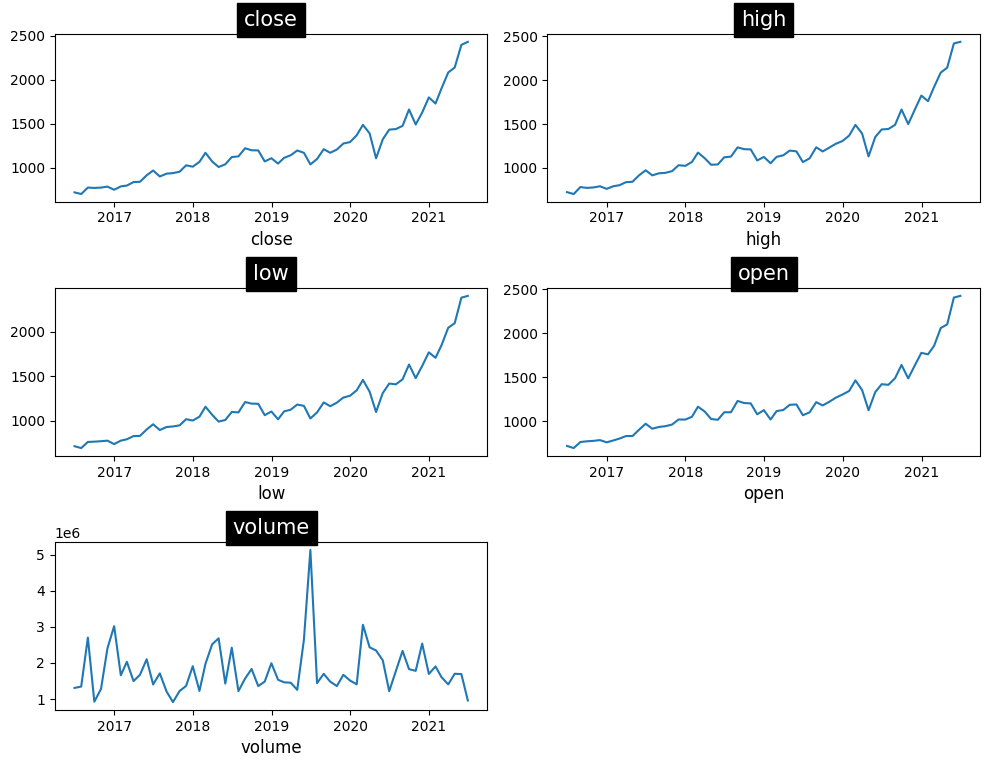

In [10]:
plt.figure(figsize = (10,20))
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

for index, i in enumerate(columns_to_plot):
    plt.subplot(8, 2, index + 1)
    plt.plot(df.index.values,df[i])
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

Stock Moving Average

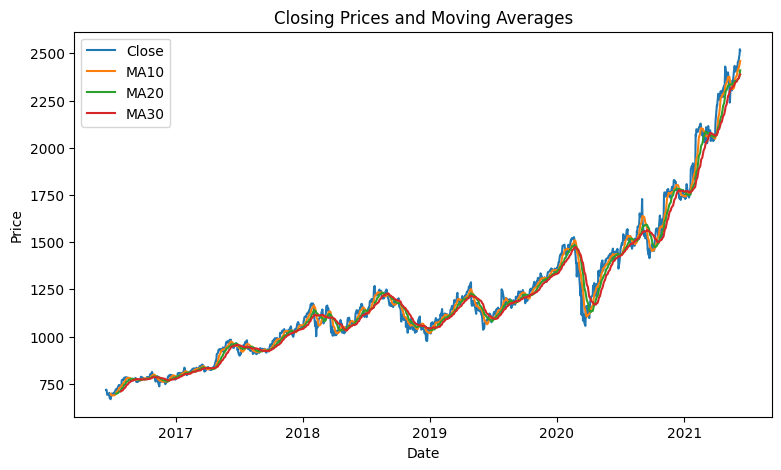

In [11]:
plt.figure(figsize=(9, 5))

data['MA10'] = data['close'].rolling(window=10).mean()
data['MA20'] = data['close'].rolling(window=20).mean()
data['MA30'] = data['close'].rolling(window=30).mean()

# Plotting the closing prices
plt.plot(data['date'], data['close'], label='Close')

# Plotting the moving averages
plt.plot(data['date'], data['MA10'], label='MA10')
plt.plot(data['date'], data['MA20'], label='MA20')
plt.plot(data['date'], data['MA30'], label='MA30')

plt.title('Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Stock Price Volatility

In [ ]:
##measureing the volatility of a stock's price using pct_change

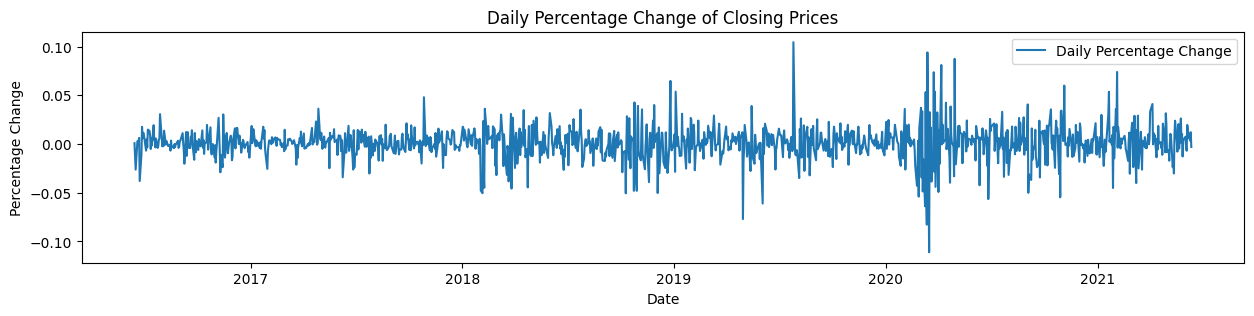

In [12]:
data['pct_change'] = data['close'].pct_change()

plt.figure(figsize=(15, 3))

# Plotting the percentage change
plt.plot(data['date'], data['pct_change'], label='Daily Percentage Change')

plt.title('Daily Percentage Change of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

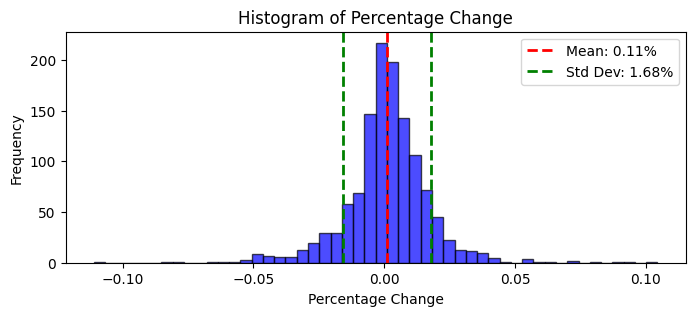

In [15]:
plt.figure(figsize=(8,3))
# Plotting the histogram
plt.hist(data['pct_change'], bins=50, alpha=0.7, color='blue', edgecolor='black')

# Adding a vertical line at the mean
mean_pct_change = data['pct_change'].mean()
plt.axvline(mean_pct_change, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_pct_change:.2%}')

# Adding a vertical line at one standard deviation above the mean
std_dev_pct_change = data['pct_change'].std()
plt.axvline(mean_pct_change + std_dev_pct_change, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_pct_change:.2%}')

# Adding a vertical line at one standard deviation below the mean
plt.axvline(mean_pct_change - std_dev_pct_change, color='green', linestyle='dashed', linewidth=2)

plt.title('Histogram of Percentage Change')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Analysing Stock Returns

In [16]:
mean_return = data['pct_change'].mean()
std_dev_return = data['pct_change'].std()
skewness = data['pct_change'].skew()
kurtosis = data['pct_change'].kurtosis()

print(f"Mean Return: {mean_return:.4%}")
print(f"Standard Deviation: {std_dev_return:.4%}")
print(f"Skewness: {skewness:.4}")
print(f"Kurtosis: {kurtosis:.4}")


Mean Return: 0.1139%
Standard Deviation: 1.6847%
Skewness: -0.07836
Kurtosis: 6.369


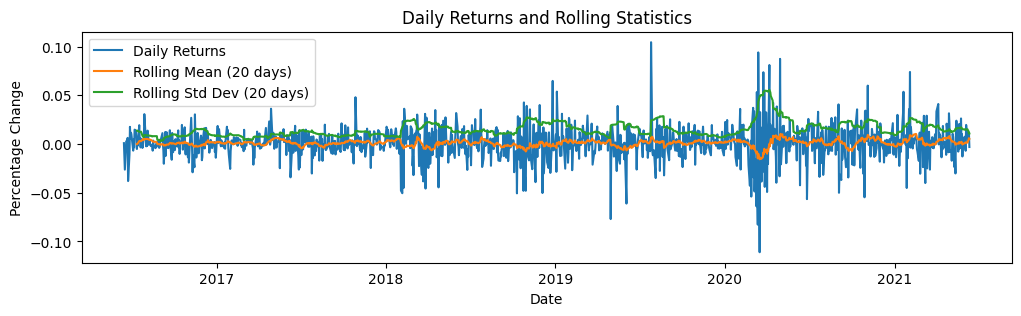

In [13]:
rolling_mean = data['pct_change'].rolling(window=20).mean()
rolling_std = data['pct_change'].rolling(window=20).std()

plt.figure(figsize=(12, 3))
plt.plot(data['date'], data['pct_change'], label='Daily Returns')
plt.plot(data['date'], rolling_mean, label='Rolling Mean (20 days)')
plt.plot(data['date'], rolling_std, label='Rolling Std Dev (20 days)')
plt.title('Daily Returns and Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


In [19]:
#standard deviation for each days return
data['std_dev'] = data['pct_change'].rolling(window=20).std()

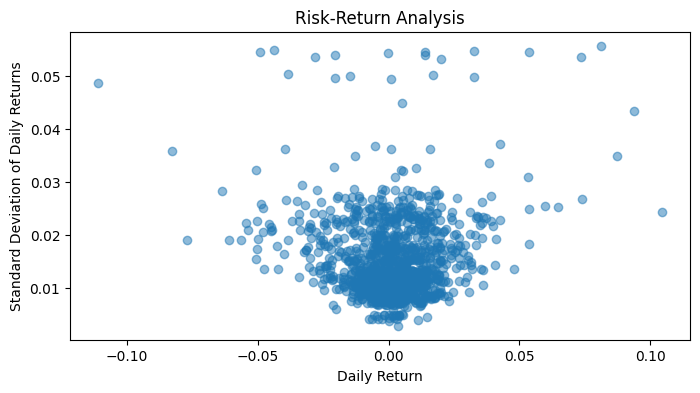

In [20]:
plt.figure(figsize=(8, 4))
plt.scatter(data['pct_change'], data['std_dev'], alpha=0.5)
plt.title('Risk-Return Analysis')
plt.xlabel('Daily Return')
plt.ylabel('Standard Deviation of Daily Returns')
plt.show()

BUilding Predictive Model

In [90]:
# Create a new dataframe with only the 'Close column 
close_data = data.filter(['close'])
# Convert the dataframe to a numpy array
dataset = close_data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1007

In [91]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [92]:
train = scaled_data[0:int(training_data_len), :]

time_step = 30

In [93]:
##### Create the training data set

x_train = []
y_train = []

for i in range(time_step, len(train)):
    x_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(x_train)
        print(y_train)
        print()
        

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598])]
[0.03966352639019283]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,
       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,
       0.00855213, 0.01286326, 0.

In [94]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [95]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


In [96]:
# Create the testing data set
test = scaled_data[training_data_len-time_step:, :]

In [97]:
# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len:, :]

In [98]:
for i in range(time_step, len(test)):
    x_test.append(test[i-time_step:i, 0])
    

In [99]:
# Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)


In [100]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [101]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [102]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [104]:
MODEL = model.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 1s 61ms/step - loss: 4.1866e-04 - accuracy: 0.0000e+00 - val_loss: 3477834.2500 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 1s 90ms/step - loss: 4.1325e-04 - accuracy: 0.0000e+00 - val_loss: 3477860.2500 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 1s 87ms/step - loss: 4.2103e-04 - accuracy: 0.0000e+00 - val_loss: 3477861.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 1s 81ms/step - loss: 3.8782e-04 - accuracy: 0.0000e+00 - val_loss: 3477927.2500 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 1s 86ms/step - loss: 4.0605e-04 - accuracy: 0.0000e+00 - val_loss: 3477843.7500 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 1s 84ms/step - loss: 3.7248e-04 - accuracy: 0.0000e+00 - val_loss: 3477836.2500 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [============================

In [105]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 2s 26ms/step


In [106]:
from sklearn.metrics import mean_squared_error,r2_score

r2Score_test = r2_score(y_test, predictions)
print('test R2 Score: %.2f ' % (r2Score_test))


test R2 Score: 0.97 


In [107]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

56.187779341654014

In [111]:
data.head(1)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MA10,MA20,MA30,pct_change,std_dev
0,718.27,722.47,713.12,716.48,1306065,718.27,722.47,713.12,716.48,1306065,0.0,1.0,NaN,NaN,NaN,NaN,NaN


C:\Users\okechukwu chude\AppData\Local\Temp\ipykernel_20400\2797152509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


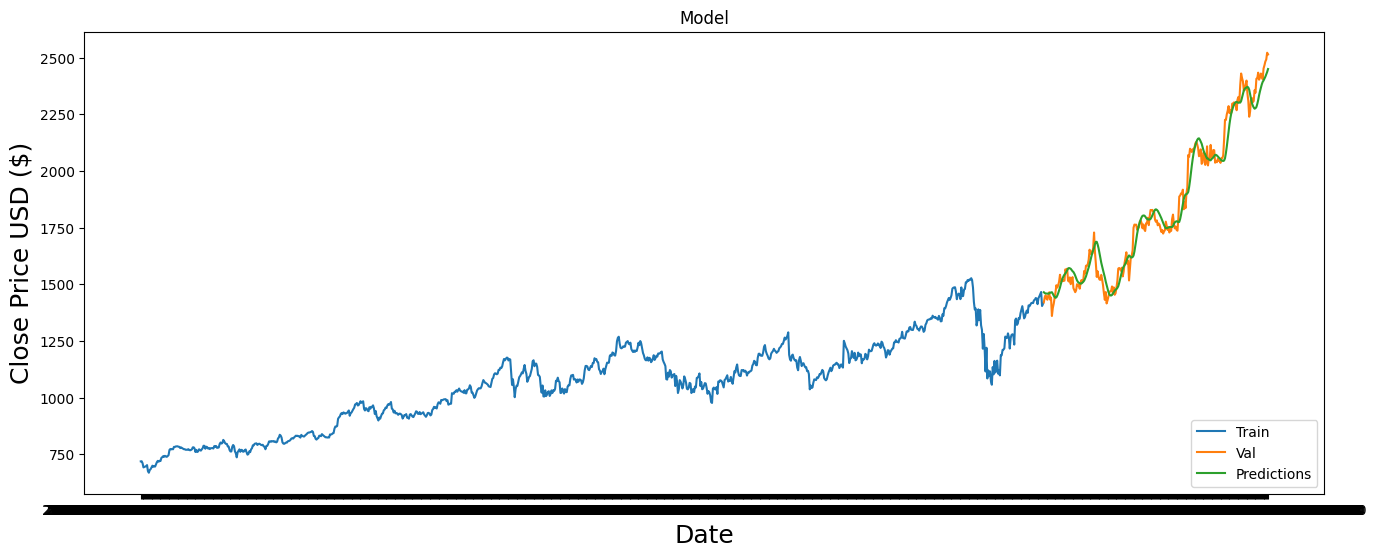

In [115]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['date'].iloc[:1007],train['close'])
plt.plot(data['date'].iloc[1007:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [116]:
# Build the Simple RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_rnn.add(SimpleRNN(64, return_sequences=False))
model_rnn.add(Dense(25))
model_rnn.add(Dense(1))

In [117]:
# Compile the Simple RNN model
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [118]:
# Train the Simple RNN model
MODEL_RNN = model_rnn.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 3s 62ms/step - loss: 0.3528 - accuracy: 0.0000e+00 - val_loss: 3479152.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 3478066.2500 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 32ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 3478358.7500 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 9.4218e-04 - accuracy: 0.0000e+00 - val_loss: 3478413.2500 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 6.9380e-04 - accuracy: 0.0000e+00 - val_loss: 3478245.5000 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 5.2006e-04 - accuracy: 0.0000e+00 - val_loss: 3478276.5000 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 0s 32m

In [119]:
# Get the models predicted price values 
rnn_predictions = model_rnn.predict(x_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)

8/8 [==============================] - 0s 7ms/step


In [120]:
rnn_r2Score = r2_score(y_test, rnn_predictions)
print('RNN test R2 Score: %.2f ' % (rnn_r2Score))

RNN test R2 Score: 0.70 


In [121]:
# Get the root mean squared error (RMSE)
rnn_rmse = np.sqrt(np.mean(((rnn_predictions - y_test) ** 2)))
rnn_rmse

176.7541605709048

C:\Users\okechukwu chude\AppData\Local\Temp\ipykernel_20400\2006764496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = rnn_predictions


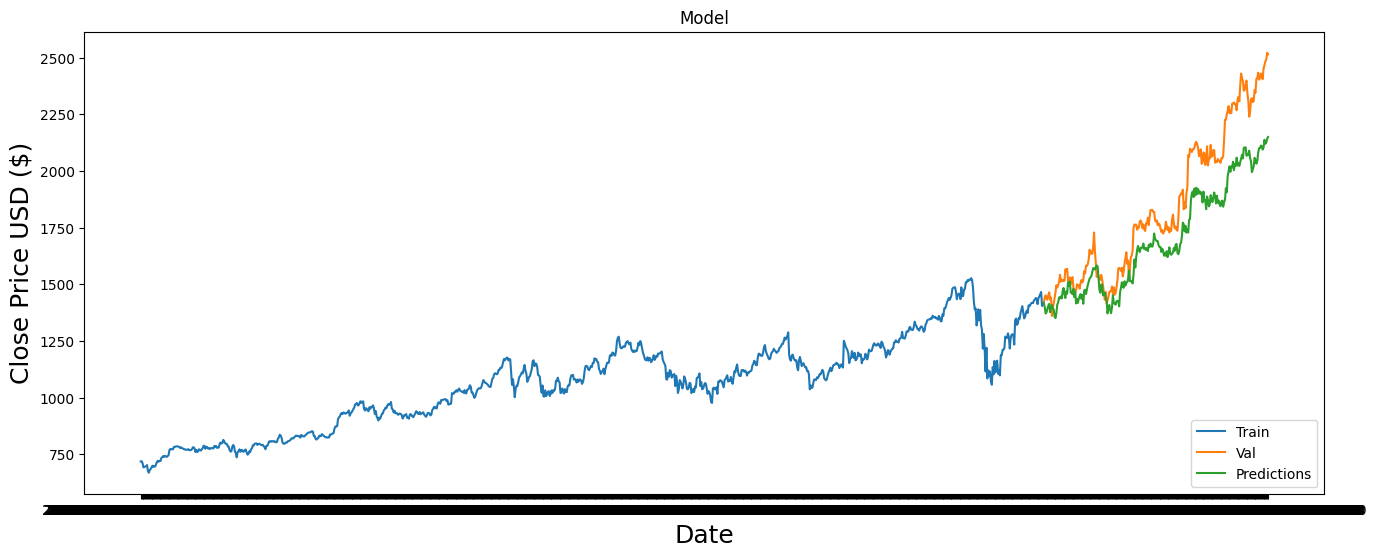

In [122]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = rnn_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['date'].iloc[:1007],train['close'])
plt.plot(data['date'].iloc[1007:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [123]:
# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))

In [124]:
# Compile the GRU model
model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [125]:
# Train the GRU model
MODEL_GRU = model_gru.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 7s 100ms/step - loss: 0.0092 - accuracy: 0.0000e+00 - val_loss: 3478342.7500 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 3477979.7500 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 3.2886e-04 - accuracy: 0.0000e+00 - val_loss: 3477774.2500 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 2.3559e-04 - accuracy: 0.0000e+00 - val_loss: 3477801.7500 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 1.8713e-04 - accuracy: 0.0000e+00 - val_loss: 3477827.2500 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 1.8521e-04 - accuracy: 0.0000e+00 - val_loss: 3477805.5000 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 1

In [126]:
gru_predictions = model_gru.predict(x_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

8/8 [==============================] - 1s 13ms/step


In [127]:
gru_r2Score = r2_score(y_test, gru_predictions)
print('GRU test R2 Score: %.2f ' % (gru_r2Score))

GRU test R2 Score: 0.98 


In [128]:
gru_rmse = np.sqrt(np.mean(((gru_predictions - y_test) ** 2)))
gru_rmse

42.828229157475924

C:\Users\okechukwu chude\AppData\Local\Temp\ipykernel_20400\3002560381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = gru_predictions


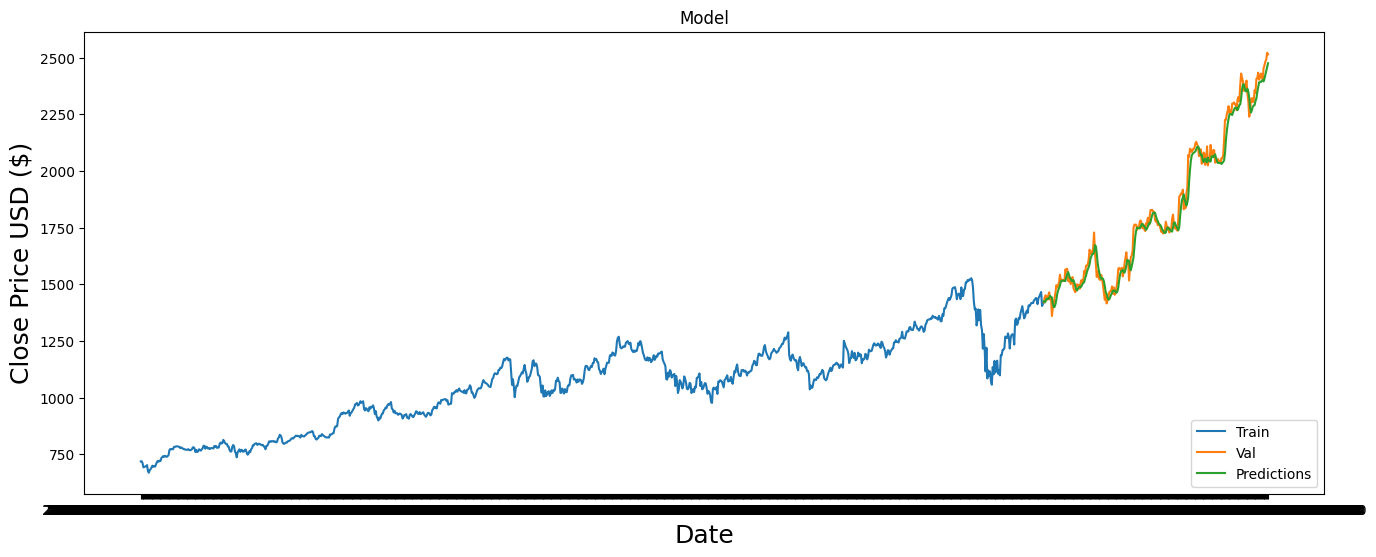

In [129]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = gru_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['date'].iloc[:1007],train['close'])
plt.plot(data['date'].iloc[1007:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [148]:
# Build the MLP model
from tensorflow.keras.layers import Dense, Flatten

model_mlp = Sequential()
model_mlp.add(Dense(128, activation='relu', input_shape=(x_train.shape[1], 1)))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Flatten())
model_mlp.add(Dense(25, activation='relu'))
model_mlp.add(Dense(1))

In [149]:
# Compile the MLP model
model_mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [150]:
# Train the MLP model
MODEL_MLP = model_mlp.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 2s 24ms/step - loss: 0.0108 - accuracy: 0.0000e+00 - val_loss: 3478339.2500 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 3478040.5000 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 8.5064e-04 - accuracy: 0.0000e+00 - val_loss: 3477956.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 7.4765e-04 - accuracy: 0.0000e+00 - val_loss: 3477940.7500 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 6.9527e-04 - accuracy: 0.0000e+00 - val_loss: 3477943.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 6.2913e-04 - accuracy: 0.0000e+00 - val_loss: 3477874.2500 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 0s 9m

In [151]:
# Get the models predicted price values 
mlp_predictions = model_mlp.predict(x_test)
mlp_predictions = scaler.inverse_transform(mlp_predictions)

8/8 [==============================] - 0s 3ms/step


In [152]:
# Evaluate performance metrics for the MLP model
mlp_r2Score = r2_score(y_test, mlp_predictions)
print('MLP test R2 Score: %.2f ' % (mlp_r2Score))

MLP test R2 Score: 0.96 


In [153]:
mlp_rmse = np.sqrt(np.mean(((mlp_predictions - y_test) ** 2)))
print('MLP Root Mean Squared Error (RMSE): %.2f ' % mlp_rmse)

MLP Root Mean Squared Error (RMSE): 62.37 


In [154]:
# Create a table for performance metrics
metrics_data = {
    'Model': ['LSTM', 'Simple RNN', 'GRU','MLP'],
    'R2 Score': [r2Score_test, rnn_r2Score, gru_r2Score,mlp_r2Score],
    'RMSE': [rmse, rnn_rmse, gru_rmse,mlp_rmse]
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)

        Model  R2 Score        RMSE
0        LSTM  0.969907   56.187779
1  Simple RNN  0.702203  176.754161
2         GRU  0.982516   42.828229
3         MLP  0.962915   62.374806


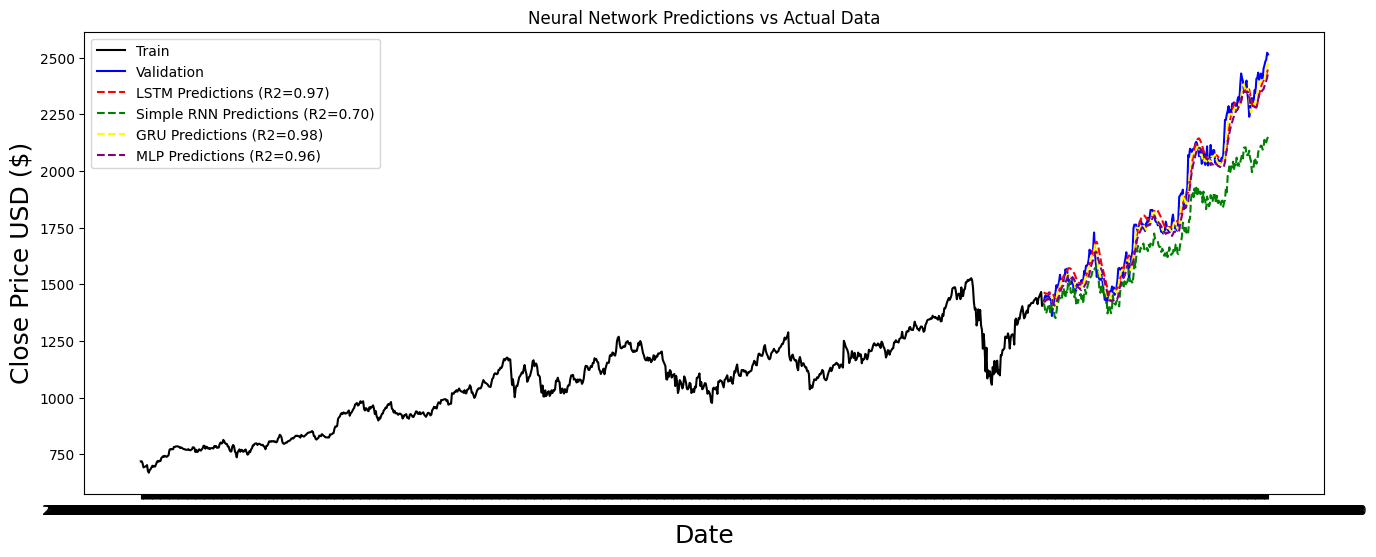

In [158]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

plt.figure(figsize=(16, 6))

# Plot actual data
plt.plot(data['date'].iloc[:1007], train['close'], label='Train', color='black')
plt.plot(data['date'].iloc[1007:], valid['close'], label='Validation', color='blue')

# Plot LSTM predictions
plt.plot(data['date'].iloc[1007:], predictions, label=f'LSTM Predictions (R2={r2Score_test:.2f})', linestyle='dashed', color='red')

# Plot Simple RNN predictions
plt.plot(data['date'].iloc[1007:], rnn_predictions, label=f'Simple RNN Predictions (R2={rnn_r2Score:.2f})', linestyle='dashed', color='green')

# Plot GRU predictions
plt.plot(data['date'].iloc[1007:], gru_predictions, label=f'GRU Predictions (R2={gru_r2Score:.2f})', linestyle='dashed', color='yellow')

# Plot MLP predictions
plt.plot(data['date'].iloc[1007:], mlp_predictions, label=f'MLP Predictions (R2={mlp_r2Score:.2f})', linestyle='dashed', color='purple')

plt.title('Neural Network Predictions vs Actual Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, median_absolute_error, explained_variance_score

In [160]:
# Evaluate performance metrics for each model
mae_lstm = mean_absolute_error(y_test, predictions)
mae_rnn = mean_absolute_error(y_test, rnn_predictions)
mae_gru = mean_absolute_error(y_test, gru_predictions)
mae_mlp = mean_absolute_error(y_test, mlp_predictions)

msle_lstm = mean_squared_log_error(y_test, predictions)
msle_rnn = mean_squared_log_error(y_test, rnn_predictions)
msle_gru = mean_squared_log_error(y_test, gru_predictions)
msle_mlp = mean_squared_log_error(y_test, mlp_predictions)

medae_lstm = median_absolute_error(y_test, predictions)
medae_rnn = median_absolute_error(y_test, rnn_predictions)
medae_gru = median_absolute_error(y_test, gru_predictions)
medae_mlp = median_absolute_error(y_test, mlp_predictions)

evs_lstm = explained_variance_score(y_test, predictions)
evs_rnn = explained_variance_score(y_test, rnn_predictions)
evs_gru = explained_variance_score(y_test, gru_predictions)
evs_mlp = explained_variance_score(y_test, mlp_predictions)


In [163]:
# Evaluate performance metrics for each model
metrics_data = {
    'Model': ['LSTM', 'Simple RNN', 'GRU', 'MLP'],
    'R2 Score': [r2Score_test, rnn_r2Score, gru_r2Score,mlp_r2Score],
    'RMSE': [rmse, rnn_rmse, gru_rmse,mlp_rmse],
    'MAE': [mae_lstm, mae_rnn, mae_gru, mae_mlp],
    'MSLE': [msle_lstm, msle_rnn, msle_gru, medae_mlp],
    'MedAE': [medae_lstm, medae_rnn, medae_gru, medae_mlp],
    'EVS': [evs_lstm, evs_rnn, evs_gru, evs_mlp]
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)

        Model  R2 Score        RMSE         MAE       MSLE       MedAE  \
0        LSTM  0.969907   56.187779   42.852939   0.000934   31.683452   
1  Simple RNN  0.702203  176.754161  147.334435   0.007845  117.774165   
2         GRU  0.982516   42.828229   32.043487   0.000537   25.422607   
3         MLP  0.962915   62.374806   48.845489  40.853296   40.853296   

        EVS  
0  0.970061  
1  0.904446  
2  0.985309  
3  0.974092  
